In [35]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [ ]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv("../data/onti_c.csv", low_memory=False, index_col='Time',parse_dates=['Time'], date_parser=dateparse)
data['Length'].min()

<AxesSubplot:xlabel='Time'>

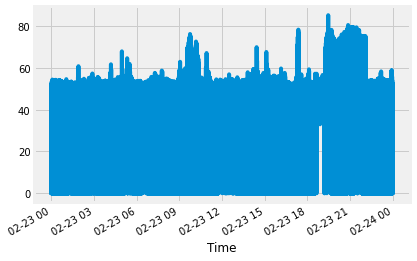

In [37]:
(data['Coolness_RHEED']).plot()

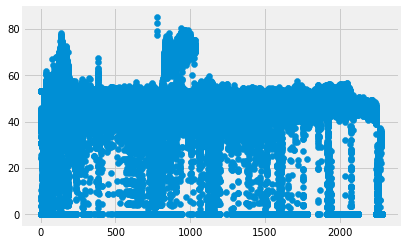

In [38]:
plt.scatter(data['Length'], data['Coolness_RHEED'])

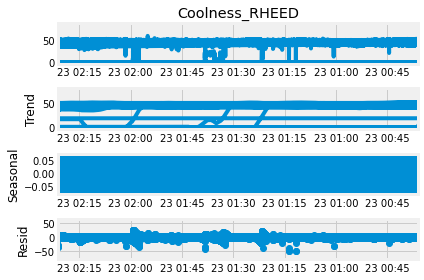

In [39]:
decomposed_coolness = sm.tsa.seasonal_decompose(data["Coolness_RHEED"],freq=240) # The frequncy is 3 times a minute
figure = decomposed_coolness.plot()
plt.show()

KeyboardInterrupt: 

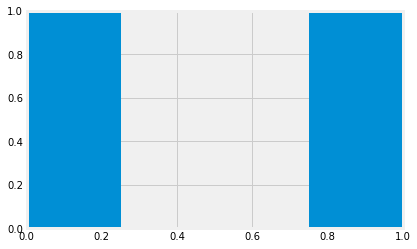

In [125]:
data['Coolness_RHEED'].resample('S').mean().plot(kind='bar')
data.head()

In [126]:
data_s = data.resample('S').mean()

NameError: name 'pyplot' is not defined

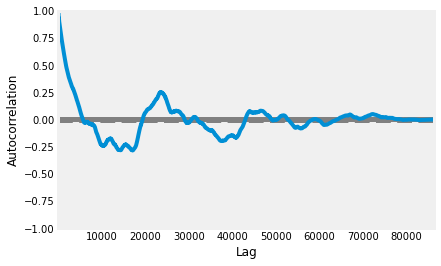

In [133]:
ax = autocorrelation_plot(data_s['Coolness_RHEED'])
pyplot.show()
ax.set_xlim([0, 500])
# this plot means P will be less than 5

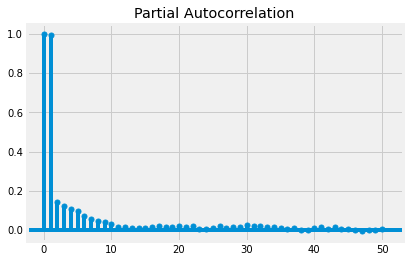

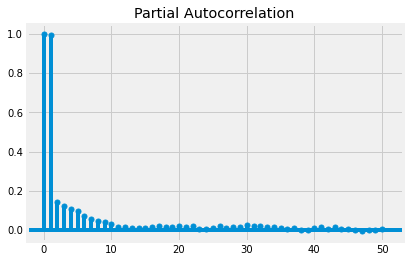

In [128]:
plot_pacf(data_s['Coolness_RHEED'])
# q can be 1 or 3 or 4

In [ ]:
# Forecasting and predicting coolness
ps = range(50000, 100000)
ds = [1]
qs = [2]
for p in ps:
    for d in ds:
        for q in qs:
            try:
                print(p, d, q)
                model = ARIMA(data_s['Coolness_RHEED'], order = (p, d, q))
                model_fit = model.fit()    
                model_fit.summary()
                model_fit.plot_predict(dynamic=False)
                plt.show()
            except Exception as e:
                print(e)
# the best is 0 1 1 (6 0 6 good 4 0 2)

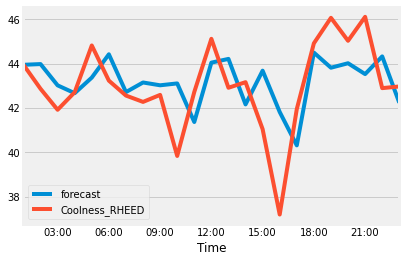

In [107]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
%matplotlib inline
plt.style.use('Solarize_Light2')
sns.set_context(
    "notebook",
    rc={
        "figure.figsize": (17, 8),
        "axes.titlesize": 18
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 17, 8

%config InlineBackend.figure_format = 'retina'

In [ ]:
model = ARIMA(data_h['Coolness_RHEED'], order = (p, d, q))
model_fit = model.fit()


In [ ]:
#rmse = math.sqrt(mean_squared_error(data['Coolness_RHEED'].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
sklearn.metrics.roc_auc_score(data['Coolness_RHEED'].[700:1001].values, result.predict(start=700,end=1000))

In [ ]:
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced) + 435
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
inverse_difference(X, forecast, days_in_year), forecast